# Resonance threshold selection

In [1]:
ID = 'MIRIAM'

In [2]:
import numpy as np
import pandas as pd
from os import walk
import scipy.io as sio
import matplotlib.pyplot as plt
import os.path

In [3]:
def get_min_max(value):
    upper = np.mean(value)+(1.8 * np.std(value))
    lower = np.mean(value)-(1.8 * np.std(value))
    return (lower,upper)

def get_min_max_wpli(value):
    upper = np.mean(value)+(2 * np.std(value))
    lower = np.mean(value)-(1.8 * np.std(value))
    # do not accept lower boundary smaller than 0
    if lower < 0:
        lower = 0
    return (lower,upper)

def get_min_max_hub(value):
    upper = np.mean(value)+(1.8 * np.std(value))
    lower = np.mean(value)-(1.8 * np.std(value))
    # do not accept lower boundary smaller than 0 
    if lower < 0:
        lower = 0
    # do not accept upper boundary larger than 1
    if upper > 1:
        upper = 1
    return (lower,upper)

In [4]:
# list all existing features
features = ['fp_dpli', 'fp_wpli', 'hl', 'pac', 'pe', 'spr', 'td']
features

['fp_dpli', 'fp_wpli', 'hl', 'pac', 'pe', 'spr', 'td']

In [5]:
#feature = 'fp_dpli'
#data = sio.loadmat("features/"+feature+"/"+"name here_5")
#data

## dPLI  (with 4 features)

In [6]:
feature = 'fp_dpli'
dpli_left_midline = []
dpli_left_lateral = []
dpli_right_midline = []
dpli_right_lateral = []

# determine length of recording:
filenames = next(walk("features/"+feature))[2]  # [] if no file
reclen = len(filenames)*2

for i in range(0,reclen):
    try:
        data = sio.loadmat("features/"+feature+"/"+"avg_dpli_"+str(i))
        dpli_left_midline.append(data['data'][0][0][0][0][0])
        dpli_left_lateral.append(data['data'][0][0][1][0][0])
        dpli_right_midline.append(data['data'][0][0][2][0][0])
        dpli_right_lateral.append(data['data'][0][0][3][0][0])
        
    except: 
        continue
        


In [7]:
(dpli_left_midline_lower,dpli_left_midline_upper)=get_min_max(dpli_left_midline)
(dpli_left_lateral_lower,dpli_left_lateral_upper)=get_min_max(dpli_left_lateral)
(dpli_right_midline_lower,dpli_right_midline_upper)=get_min_max(dpli_right_midline)
(dpli_right_lateral_lower,dpli_right_lateral_upper)=get_min_max(dpli_right_lateral)

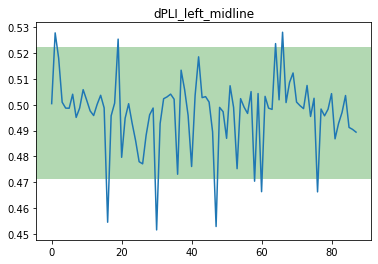

In [8]:
plt.plot(dpli_left_midline)
plt.title('dPLI_left_midline')
plt.axhspan(dpli_left_midline_upper, dpli_left_midline_lower, facecolor='green', alpha=0.3)

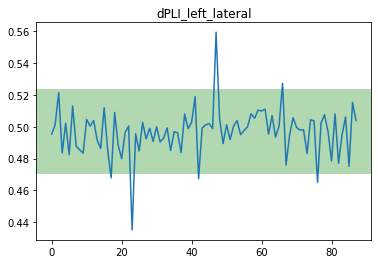

In [9]:
plt.plot(dpli_left_lateral)
plt.title('dPLI_left_lateral')
plt.axhspan(dpli_left_lateral_upper, dpli_left_lateral_lower, facecolor='green', alpha=0.3)

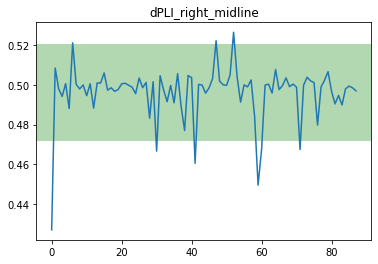

In [10]:
plt.plot(dpli_right_midline)
plt.title('dPLI_right_midline')
plt.axhspan(dpli_right_midline_upper, dpli_right_midline_lower, facecolor='green', alpha=0.3)

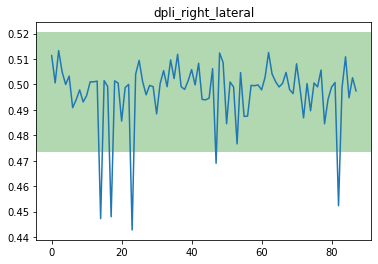

In [11]:
plt.plot(dpli_right_lateral)
plt.title('dpli_right_lateral')
plt.axhspan(dpli_right_lateral_upper, dpli_right_lateral_lower, facecolor='green', alpha=0.3)

## wPLI  (with 4 features)

In [12]:
feature = 'fp_wpli'
wpli_left_midline = []
wpli_left_lateral = []
wpli_right_midline = []
wpli_right_lateral = []

for i in range(0,reclen):
    try:
        data = sio.loadmat("features/"+feature+"/"+"avg_wpli_"+str(i))
        wpli_left_midline.append(data['data'][0][0][0][0][0])
        wpli_left_lateral.append(data['data'][0][0][1][0][0])
        wpli_right_midline.append(data['data'][0][0][2][0][0])
        wpli_right_lateral.append(data['data'][0][0][3][0][0])
        
    except: 
        continue
        


In [13]:
(wpli_left_midline_lower,wpli_left_midline_upper)=get_min_max_wpli(wpli_left_midline)
(wpli_left_lateral_lower,wpli_left_lateral_upper)=get_min_max_wpli(wpli_left_lateral)
(wpli_right_midline_lower,wpli_right_midline_upper)=get_min_max_wpli(wpli_right_midline)
(wpli_right_lateral_lower,wpli_right_lateral_upper)=get_min_max_wpli(wpli_right_lateral)

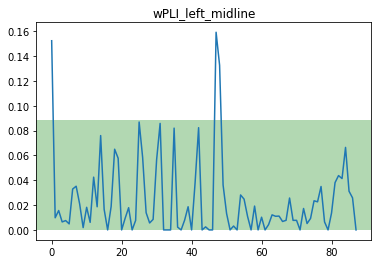

In [14]:
plt.plot(wpli_left_midline)
plt.title('wPLI_left_midline')
plt.axhspan(wpli_left_midline_upper, wpli_left_midline_lower, facecolor='green', alpha=0.3)

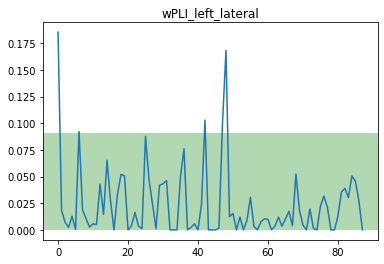

In [15]:
plt.plot(wpli_left_lateral)
plt.title('wPLI_left_lateral')
plt.axhspan(wpli_left_lateral_upper, wpli_left_lateral_lower, facecolor='green', alpha=0.3)

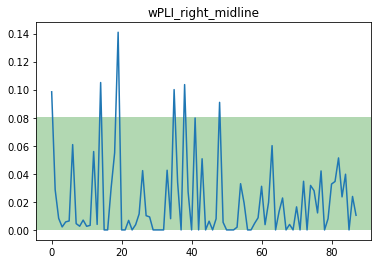

In [16]:
plt.plot(wpli_right_midline)
plt.title('wPLI_right_midline')
plt.axhspan(wpli_right_midline_upper, wpli_right_midline_lower, facecolor='green', alpha=0.3)

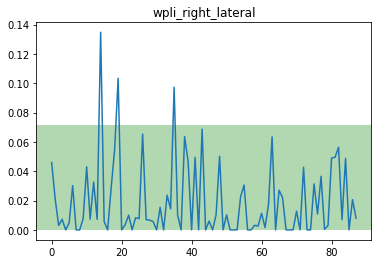

In [17]:
plt.plot(wpli_right_lateral)
plt.title('wpli_right_lateral')
plt.axhspan(wpli_right_lateral_upper, wpli_right_lateral_lower, facecolor='green', alpha=0.3)

### Hub location (hl)  
###### (1 feature)

In [18]:
feature = 'hl'
hub_location = []

for i in range(0,reclen):
    try:
        data = sio.loadmat("features/"+feature+"/"+"hd_channel_index_"+str(i))
        hub_location.append(data['data'][0][0])
        
    except: 
        continue
        


In [19]:
(hub_location_lower,hub_location_upper)=get_min_max_hub(hub_location)

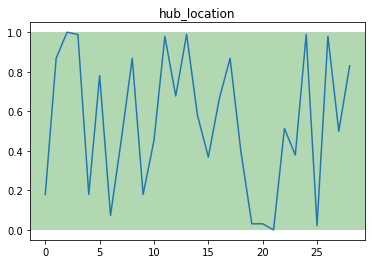

In [20]:
plt.plot(hub_location)
plt.title('hub_location')
plt.axhspan(hub_location_upper, hub_location_lower, facecolor='green', alpha=0.3)

### Permutation-Entropy (pe)  
###### (2 features)

In [21]:
feature = 'pe'
pe_frontal = []
# here wrongly named posterior, needs to be parietal
pe_parietal = []

for i in range(0,reclen):
    try:
        data_f = sio.loadmat("features/"+feature+"/"+"avg_pe_frontal_"+str(i))
        data_p = sio.loadmat("features/"+feature+"/"+"avg_pe_posterior_"+str(i))
        pe_frontal.append(data_f['data'][0][0])
        pe_parietal.append(data_p['data'][0][0])
        
    except: 
        continue
        

In [22]:
(pe_frontal_lower,pe_frontal_upper)=get_min_max(pe_frontal)
(pe_parietal_lower,pe_parietal_upper)=get_min_max(pe_parietal)

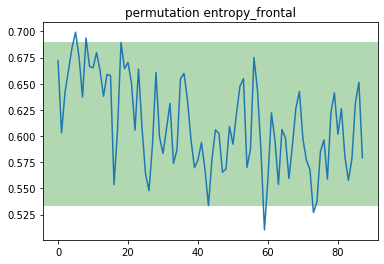

In [23]:
plt.plot(pe_frontal)
plt.title('permutation entropy_frontal')
plt.axhspan(pe_frontal_upper, pe_frontal_lower, facecolor='green', alpha=0.3)

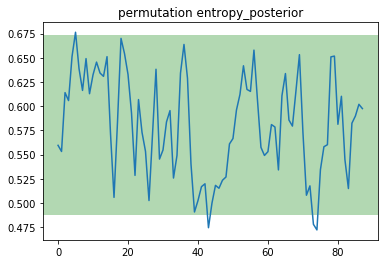

In [24]:
plt.plot(pe_parietal)
plt.title('permutation entropy_posterior')
plt.axhspan(pe_parietal_upper, pe_parietal_lower, facecolor='green', alpha=0.3)

### Phase-Amplitude-Coupling (pac)  
###### (1 feature)

In [25]:
feature = 'pac'
pac_frontal = []
pac_parietal = []

for i in range(0,reclen):
    try:
        data_f = sio.loadmat("features/"+feature+"/"+"rpt_frontal_"+str(i))
        data_p = sio.loadmat("features/"+feature+"/"+"rpt_parietal_"+str(i))
        pac_frontal.append(data_f['data'][0][0])
        pac_parietal.append(data_p['data'][0][0])
        
    except: 
        continue
        


In [26]:
(pac_frontal_lower,pac_frontal_upper)=get_min_max(pac_frontal)
(pac_parietal_lower,pac_parietal_upper)=get_min_max(pac_parietal)

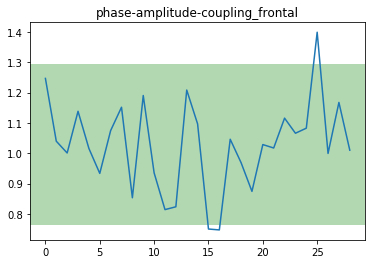

In [27]:
plt.plot(pac_frontal)
plt.title('phase-amplitude-coupling_frontal')
plt.axhspan(pac_frontal_upper, pac_frontal_lower, facecolor='green', alpha=0.3)

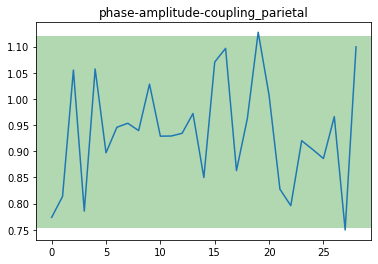

In [28]:
plt.plot(pac_parietal)
plt.title('phase-amplitude-coupling_parietal')
plt.axhspan(pac_parietal_upper, pac_parietal_lower, facecolor='green', alpha=0.3)

### spectral ratio (spr)  
###### (2 features)

In [29]:
feature = 'spr'
spr_a_t = []
spr_b_a = []

for i in range(0,reclen):
    try:
        data_at = sio.loadmat("features/"+feature+"/"+"ratio_alpha_theta_"+str(i))
        data_ba = sio.loadmat("features/"+feature+"/"+"ratio_beta_alpha_"+str(i))
        spr_a_t.append(data_at['data'][0][0])
        spr_b_a.append(data_ba['data'][0][0])
        
    except: 
        continue
        

In [30]:
(spr_a_t_lower,spr_a_t_upper)=get_min_max(spr_a_t)
(spr_b_a_lower,spr_b_a_upper)=get_min_max(spr_b_a)

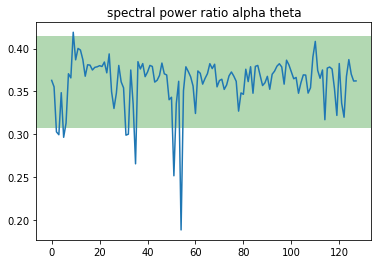

In [31]:
plt.plot(spr_a_t)
plt.title('spectral power ratio alpha theta')
plt.axhspan(spr_a_t_upper, spr_a_t_lower, facecolor='green', alpha=0.3)

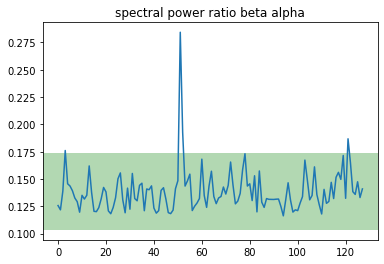

In [32]:
plt.plot(spr_b_a)
plt.title('spectral power ratio beta alpha')
plt.axhspan(spr_b_a_upper, spr_b_a_lower, facecolor='green', alpha=0.3)

### topographic distribution (td)  
###### (1 feature)

In [33]:
feature = 'td'
td = []

for i in range(0,reclen):
    try:
        data = sio.loadmat("features/"+feature+"/"+"ratio_front_back_"+str(i))
        td.append(data['data'][0][0])
        
    except: 
        continue
        

In [34]:
(td_lower,td_upper)=get_min_max(td)

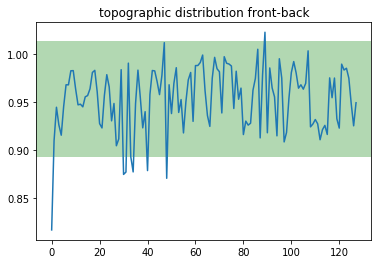

In [35]:
plt.plot(td)
plt.title('topographic distribution front-back')
plt.axhspan(td_upper, td_lower, facecolor='green', alpha=0.3)

# Fill in the threshold txt for flaskapp

In [36]:
# Read in the file
with open('default_preset_DUMMY.txt', 'r') as file :
  filedata = file.read()


In [37]:
# Replace the target string

## DPLI
filedata = filedata.replace('dpli_left_midline_lower', format(dpli_left_midline_lower,".2f"))
filedata = filedata.replace('dpli_left_midline_upper', format(dpli_left_midline_upper,".2f"))

filedata = filedata.replace('dpli_right_midline_lower', format(dpli_right_midline_lower,".2f"))
filedata = filedata.replace('dpli_right_midline_upper', format(dpli_right_midline_upper,".2f"))

filedata = filedata.replace('dpli_left_lateral_lower', format(dpli_left_lateral_lower,".2f"))
filedata = filedata.replace('dpli_left_lateral_upper', format(dpli_left_lateral_upper,".2f"))

filedata = filedata.replace('dpli_right_lateral_lower', format(dpli_right_lateral_lower,".2f"))
filedata = filedata.replace('dpli_right_lateral_upper', format(dpli_right_lateral_upper,".2f"))

In [38]:
# Replace the target string

## WPLI
filedata = filedata.replace('wpli_left_midline_lower', format(wpli_left_midline_lower,".2f"))
filedata = filedata.replace('wpli_left_midline_upper', format(wpli_left_midline_upper,".2f"))

filedata = filedata.replace('wpli_right_midline_lower', format(wpli_right_midline_lower,".2f"))
filedata = filedata.replace('wpli_right_midline_upper', format(wpli_right_midline_upper,".2f"))

filedata = filedata.replace('wpli_left_lateral_lower', format(wpli_left_lateral_lower,".2f"))
filedata = filedata.replace('wpli_left_lateral_upper', format(wpli_left_lateral_upper,".2f"))

filedata = filedata.replace('wpli_right_lateral_lower', format(wpli_right_lateral_lower,".2f"))
filedata = filedata.replace('wpli_right_lateral_upper', format(wpli_right_lateral_upper,".2f"))


In [39]:
# Replace the target string

## HUB
filedata = filedata.replace('hub_location_lower', format(hub_location_lower,".2f"))
filedata = filedata.replace('hub_location_upper', format(hub_location_upper,".2f"))

In [40]:
# Replace the target string

## PE
filedata = filedata.replace('pe_frontal_lower', format(pe_frontal_lower,".2f"))
filedata = filedata.replace('pe_frontal_upper', format(pe_frontal_upper,".2f"))

filedata = filedata.replace('pe_parietal_lower', format(pe_parietal_lower,".2f"))
filedata = filedata.replace('pe_parietal_upper', format(pe_parietal_upper,".2f"))

In [41]:
# Replace the target string

## PAC
filedata = filedata.replace('pac_frontal_lower', format(pac_frontal_lower,".2f"))
filedata = filedata.replace('pac_frontal_upper', format(pac_frontal_upper,".2f"))

filedata = filedata.replace('pac_parietal_lower', format(pac_parietal_lower,".2f"))
filedata = filedata.replace('pac_parietal_upper', format(pac_parietal_upper,".2f"))

In [42]:
# Replace the target string

## SPR
filedata = filedata.replace('spr_a_t_lower', format(spr_a_t_lower,".2f"))
filedata = filedata.replace('spr_a_t_upper', format(spr_a_t_upper,".2f"))

filedata = filedata.replace('spr_b_a_lower', format(spr_b_a_lower,".2f"))
filedata = filedata.replace('spr_b_a_upper', format(spr_b_a_upper,".2f"))

In [43]:
# Replace the target string

## TD
filedata = filedata.replace('td_lower', format(td_lower,".2f"))
filedata = filedata.replace('td_upper', format(td_upper,".2f"))


In [44]:

# Write the file out again
with open('preset'+ID+'.txt', 'w') as file:
  file.write(filedata)


In [46]:
with open('/Users/biapt/Documents/GitHub/EEGsonic/resonance_gui/flask-app/static/playerPresets/preset'+ID+'.txt', 'w') as file:
  file.write(filedata)